In [38]:
# Operating system, date and time, data analysis, data visuaisation libs

import os , re, datetime , calendar , pandas as pd , seaborn as sns , matplotlib.pyplot as plt
#import hvplot.pandas
import panel as pn
pn.extension('tabulator')


In [39]:
movie_data = pd.read_csv('data/watched-movies.csv')

movie_data

,Title,Top Cast,Summary,Director,Writer,Main Genres,Motion Picture Rating,Runtime,Month Watched,Release Year,Rating,Number of Ratings,Budget,Gross in US & Canada,Gross worldwide,Opening Weekend Gross in US & Canada
0,Murder Mystery 2,"Adam Sandler,Jennifer Aniston,Mark Strong,Mela...",Full-time detectives Nick and Audrey are strug...,Jeremy Garelick,NaN,"Action,Comedy,Crime",PG-13,1h 30m,4/1/2023,2023,5.7/10,64K,NaN,NaN,NaN,NaN
1,Tetris,"Taron Egerton,Mara Huf,Miles Barrow,Rick Yune,...",The story of how one of the world's most popul...,Jon S. Baird,Noah Pink,"Biography,Drama,History",R,1h 58m,4/1/2023,2023,7.4/10,74K,NaN,NaN,NaN,NaN
2,Creed III,"Michael B. Jordan,Tessa Thompson,Jonathan Majo...",Adonis has been thriving in both his career an...,Michael B. Jordan,"Ryan Coogler,Keenan Coogler,Zach Baylin","Drama,Sport",PG-13,1h 56m,4/1/2023,2023,6.8/10,87K,"$75,000,000 (estimated)","$156,248,615","$275,248,615","$58,370,007Mar 5, 2023"
3,Shazam! Fury of the Gods,"Zachary Levi,Asher Angel,Jack Dylan Grazer,Rac...",The film continues the story of teenage Billy ...,David F. Sandberg,"Henry Gayden,Chris Morgan,Bill Parker","Action,Adventure,Comedy",PG-13,2h 10m,4/1/2023,2023,6.0/10,114K,"$125,000,000 (estimated)","$57,638,006","$133,838,006","$30,111,158Mar 19, 2023"
4,Black Panther: Wakanda Forever,"Letitia Wright,Lupita Nyong'o,Danai Gurira,Win...",The people of Wakanda fight to protect their h...,Ryan Coogler,"Ryan Coogler,Stan Lee,Joe Robert Cole","Action,Adventure,Drama",PG-13,2h 41m,2/1/2023,2022,6.7/10,291K,"$250,000,000 (estimated)","$453,829,060","$859,208,836","$181,339,761Nov 13, 2022"
5,Puss in Boots: The Last Wish,"Antonio Banderas,Salma Hayek,Harvey Guillen,Fl...",When Puss in Boots discovers that his passion ...,"Joel Crawford,Januel Mercado","Tommy Swerdlow,Tom Wheeler,Paul Fisher","Animation,Adventure,Comedy",PG,1h 42m,2/1/2023,2022,7.8/10,161K,"$90,000,000 (estimated)","$185,535,345","$481,080,374","$12,429,515Dec 25, 2022"
6,Ant-Man and the Wasp: Quantumania,"Paul Rudd,Evangeline Lilly,Michael Douglas,Mic...",Scott Lang and Hope Van Dyne are dragged into ...,Peyton Reed,"Stan Lee,Jeff Loveness,Larry Lieber","Action,Adventure,Comedy",PG-13,2h 4m,4/1/2023,2023,6.1/10,213K,"$200,000,000 (estimated)","$214,504,909","$476,071,180","$106,109,650Feb 19, 2023"
7,Avatar: The Way of Water,"Sam Worthington,Zoe Saldana,Sigourney Weaver,K...",Jake Sully lives with his newfound family form...,James Cameron,"Amanda Silver,James Cameron,Rick Jaffa","Action,Adventure,Fantasy",PG-13,3h 12m,4/1/2023,2022,7.6/10,469K,"$350,000,000 (estimated)","$684,075,767","$2,320,250,281.00","$134,100,226Dec 18, 2022"
8,Dungeons & Dragons: Honor Among Thieves,"Hugh Grant,Justice Smith,Michelle Rodriguez,Ch...",A charming thief and a band of unlikely advent...,"John Francis Daley,Jonathan Goldstein","John Francis Daley,Michael Gilio,Jonathan Gold...","Action,Adventure,Comedy",PG-13,2h 14m,5/1/2023,2023,7.3/10,202K,"$150,000,000 (estimated)","$93,277,026","$208,177,026","$37,205,784Apr 2, 2023"
9,Elemental,"Leah Lewis,Ronnie Del Carmen,Wedmi McLendon-Co...","Follows Ember and Wade, in a city where fire-,...",Peter Sohn,"Kat Likkel,Brenda Hsueh,John Hoberg","Animation,Adventure,Comedy",PG,1h 41m,12/1/2023,2023,7.0/10,99K,"$200,000,000 (estimated)","$154,426,697","$495,923,852","$29,602,429Jun 18, 2023"


### Information

In [40]:
movie_data.info()

movie_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Title                                 33 non-null     object
 1   Top Cast                              33 non-null     object
 2   Summary                               33 non-null     object
 3   Director                              33 non-null     object
 4   Writer                                32 non-null     object
 5   Main Genres                           33 non-null     object
 6   Motion Picture Rating                 32 non-null     object
 7   Runtime                               33 non-null     object
 8   Month Watched                         33 non-null     object
 9   Release Year                          33 non-null     int64 
 10  Rating                                33 non-null     object
 11  Number of Ratings                 

,Release Year
count,33.000000
mean,2021.242424
std,5.793479
min,1998.000000
25%,2023.000000
50%,2023.000000
75%,2023.000000
max,2023.000000


### Data Cleaning

In [41]:
# Check for missing values
movie_data.isnull().sum()

Title                                   0
Top Cast                                0
Summary                                 0
Director                                0
Writer                                  1
Main Genres                             0
Motion Picture Rating                   1
Runtime                                 0
Month Watched                           0
Release Year                            0
Rating                                  0
Number of Ratings                       0
Budget                                  4
Gross in US & Canada                    7
Gross worldwide                         6
Opening Weekend Gross in US & Canada    7
dtype: int64

In [42]:
# Replace missing values with zero
movie_data.fillna(0, inplace=True)

# Check missing values again
movie_data.isnull().sum()


Title                                   0
Top Cast                                0
Summary                                 0
Director                                0
Writer                                  0
Main Genres                             0
Motion Picture Rating                   0
Runtime                                 0
Month Watched                           0
Release Year                            0
Rating                                  0
Number of Ratings                       0
Budget                                  0
Gross in US & Canada                    0
Gross worldwide                         0
Opening Weekend Gross in US & Canada    0
dtype: int64

In [43]:
# Check for duplicates
movie_data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
dtype: bool

In [44]:
# Drop all unwanted columns
movie_data.drop(columns=['Summary','Motion Picture Rating','Budget','Gross in US & Canada','Gross worldwide','Opening Weekend Gross in US & Canada'], inplace=True)

movie_data.head()

,Title,Top Cast,Director,Writer,Main Genres,Runtime,Month Watched,Release Year,Rating,Number of Ratings
0,Murder Mystery 2,"Adam Sandler,Jennifer Aniston,Mark Strong,Mela...",Jeremy Garelick,0,"Action,Comedy,Crime",1h 30m,4/1/2023,2023,5.7/10,64K
1,Tetris,"Taron Egerton,Mara Huf,Miles Barrow,Rick Yune,...",Jon S. Baird,Noah Pink,"Biography,Drama,History",1h 58m,4/1/2023,2023,7.4/10,74K
2,Creed III,"Michael B. Jordan,Tessa Thompson,Jonathan Majo...",Michael B. Jordan,"Ryan Coogler,Keenan Coogler,Zach Baylin","Drama,Sport",1h 56m,4/1/2023,2023,6.8/10,87K
3,Shazam! Fury of the Gods,"Zachary Levi,Asher Angel,Jack Dylan Grazer,Rac...",David F. Sandberg,"Henry Gayden,Chris Morgan,Bill Parker","Action,Adventure,Comedy",2h 10m,4/1/2023,2023,6.0/10,114K
4,Black Panther: Wakanda Forever,"Letitia Wright,Lupita Nyong'o,Danai Gurira,Win...",Ryan Coogler,"Ryan Coogler,Stan Lee,Joe Robert Cole","Action,Adventure,Drama",2h 41m,2/1/2023,2022,6.7/10,291K


In [45]:
# Clean Director column (remove contents in parenthsis)
movie_data['Director'] = movie_data['Director'].map(lambda x: re.sub(r'\([^)]*\)','', x))



In [46]:
# Clean rating column (remove /10)

movie_data['Rating'] = movie_data['Rating'].map(lambda x: x.replace('/10',''))
movie_data.head(5)

,Title,Top Cast,Director,Writer,Main Genres,Runtime,Month Watched,Release Year,Rating,Number of Ratings
0,Murder Mystery 2,"Adam Sandler,Jennifer Aniston,Mark Strong,Mela...",Jeremy Garelick,0,"Action,Comedy,Crime",1h 30m,4/1/2023,2023,5.7,64K
1,Tetris,"Taron Egerton,Mara Huf,Miles Barrow,Rick Yune,...",Jon S. Baird,Noah Pink,"Biography,Drama,History",1h 58m,4/1/2023,2023,7.4,74K
2,Creed III,"Michael B. Jordan,Tessa Thompson,Jonathan Majo...",Michael B. Jordan,"Ryan Coogler,Keenan Coogler,Zach Baylin","Drama,Sport",1h 56m,4/1/2023,2023,6.8,87K
3,Shazam! Fury of the Gods,"Zachary Levi,Asher Angel,Jack Dylan Grazer,Rac...",David F. Sandberg,"Henry Gayden,Chris Morgan,Bill Parker","Action,Adventure,Comedy",2h 10m,4/1/2023,2023,6.0,114K
4,Black Panther: Wakanda Forever,"Letitia Wright,Lupita Nyong'o,Danai Gurira,Win...",Ryan Coogler,"Ryan Coogler,Stan Lee,Joe Robert Cole","Action,Adventure,Drama",2h 41m,2/1/2023,2022,6.7,291K


### Data transformation

In [47]:
# Transform runtime from string to mins

# Function to convert 'h' to minutes
def convert_to_minutes(duration):
    if 'h' in duration and 'm' in duration:
        hours, minutes = duration.split('h ')
        hours = int(hours)
        minutes = int(minutes.replace('m', ''))
    elif 'h' in duration:
        hours = int(duration.replace('h', ''))
        minutes = 0
    else:
        hours = 0
        minutes = int(duration.replace('m', ''))

    total_minutes = hours * 60 + minutes
    return total_minutes

# Applying the function to the 'Runtime' column
movie_data['Runtime'] = movie_data['Runtime'].apply(convert_to_minutes)


#Transform date string to months
date_col = pd.DatetimeIndex(movie_data['Month Watched'])
movie_data['Month Watched'] = date_col.month.map(lambda x: calendar.month_name[x])


# Convert rating string to floats
movie_data['Rating'] = movie_data['Rating'].astype(float)


movie_data.head(5)


,Title,Top Cast,Director,Writer,Main Genres,Runtime,Month Watched,Release Year,Rating,Number of Ratings
0,Murder Mystery 2,"Adam Sandler,Jennifer Aniston,Mark Strong,Mela...",Jeremy Garelick,0,"Action,Comedy,Crime",90,April,2023,5.7,64K
1,Tetris,"Taron Egerton,Mara Huf,Miles Barrow,Rick Yune,...",Jon S. Baird,Noah Pink,"Biography,Drama,History",118,April,2023,7.4,74K
2,Creed III,"Michael B. Jordan,Tessa Thompson,Jonathan Majo...",Michael B. Jordan,"Ryan Coogler,Keenan Coogler,Zach Baylin","Drama,Sport",116,April,2023,6.8,87K
3,Shazam! Fury of the Gods,"Zachary Levi,Asher Angel,Jack Dylan Grazer,Rac...",David F. Sandberg,"Henry Gayden,Chris Morgan,Bill Parker","Action,Adventure,Comedy",130,April,2023,6.0,114K
4,Black Panther: Wakanda Forever,"Letitia Wright,Lupita Nyong'o,Danai Gurira,Win...",Ryan Coogler,"Ryan Coogler,Stan Lee,Joe Robert Cole","Action,Adventure,Drama",161,February,2022,6.7,291K


## Exploratory Data Analysis

In [86]:
# Total  movies watched
total_watched = movie_data['Title'].count()

# Plotting a Donut chart

# Total runtime
total_runtime = movie_data['Runtime'].sum()

print("Total movies watched : ", total_watched)
print ("Total minutes : ", total_runtime, "minutes")

Total movies watched :  33
Total minutes :  4324 minutes


### Actor Analysis


- A full analysis on performers(Actors/actresses). Find out the Favourite actor with number of associated movies and the Top 3 actors 



In [49]:
# Create dataframe for director
actors_data = movie_data['Top Cast'].str.split(',', expand=True)
actors_data.columns = [f"Actor_{i+1}" for i in range(actors_data.shape[1])]


actors_data.head(3)

,Actor_1,Actor_2,Actor_3,Actor_4,Actor_5,Actor_6
0,Adam Sandler,Jennifer Aniston,Mark Strong,Melanie Laurent,Jodie Turner-Smith,John Kani
1,Taron Egerton,Mara Huf,Miles Barrow,Rick Yune,Nikita Efremov,Toby Jones
2,Michael B. Jordan,Tessa Thompson,Jonathan Majors,Wood Harris,Phylicia Rashad,Mila Davis-Kent


In [50]:
# Combine multiple genre columns into a single series
actors_series = actors_data.stack()

# Display all rows
# pd.set_option('display.max_rows',None)


actor_counts = actors_series.value_counts().reset_index()

# rename colmun
actor_counts.columns=['Actor','Movie Count']

# Total number of top casts
print("Total Top Cast Actors: ",actors_series.count(),"\n")



Total Top Cast Actors:  196 



### Favourite actor Drama. review 

In [63]:
merged_data = pd.merge(actors_data,movie_data, left_index=True, right_index=True, how='inner')

actor_columns = ['Actor_1', 'Actor_2','Actor_3', 'Actor_4', 'Actor_5', 'Actor_6']
melted_actors = merged_data[actor_columns].melt(value_name='Actor').dropna()


runtime_info = movie_data[['Runtime']].reset_index()
merged_actors_info = pd.concat([melted_actors,runtime_info],axis=1,join='inner')


actor_summary = merged_actors_info.groupby('Actor').agg({'Actor':'count','Runtime':'sum'})
actor_summary.columns=['Movie_Count','Total_Runtime']




favourite_actor = actor_summary.nlargest(1,['Movie_Count','Total_Runtime'],'all')
top_actors= actor_summary.nlargest(5,['Movie_Count','Total_Runtime'],'all')

print("Favourite actor based on runtime: ")
print(favourite_actor)

Favourite actor based on runtime: 
                 Movie_Count  Total_Runtime
Actor                                      
Sam Worthington            1            192


In [66]:
# import networkx as nx
# nxG = nx.Graph()

# x = "Yam"
# y = "Potatoe"
# z = "Cassava"

# nxG.add_node(x)
# nxG.add_edge(x,y)
# nxG.add_edge(y,z)
# nxG.add_edge(x, z)


# nx.draw(nxG, with_labels=True)

# plt.plot()

### Director Analysis

- A full analysis on directors. Find out the total number of directors, Favourite director with number of associated movies and the Top 3 directors.

In [53]:
# Create dataframe for director
directors_data = movie_data['Director'].str.split(',', expand=True)
directors_data.columns = [f"Director_{i+1}" for i in range(directors_data.shape[1])]


directors_data.head(3)


,Director_1,Director_2,Director_3
0,Jeremy Garelick,None,None
1,Jon S. Baird,None,None
2,Michael B. Jordan,None,None


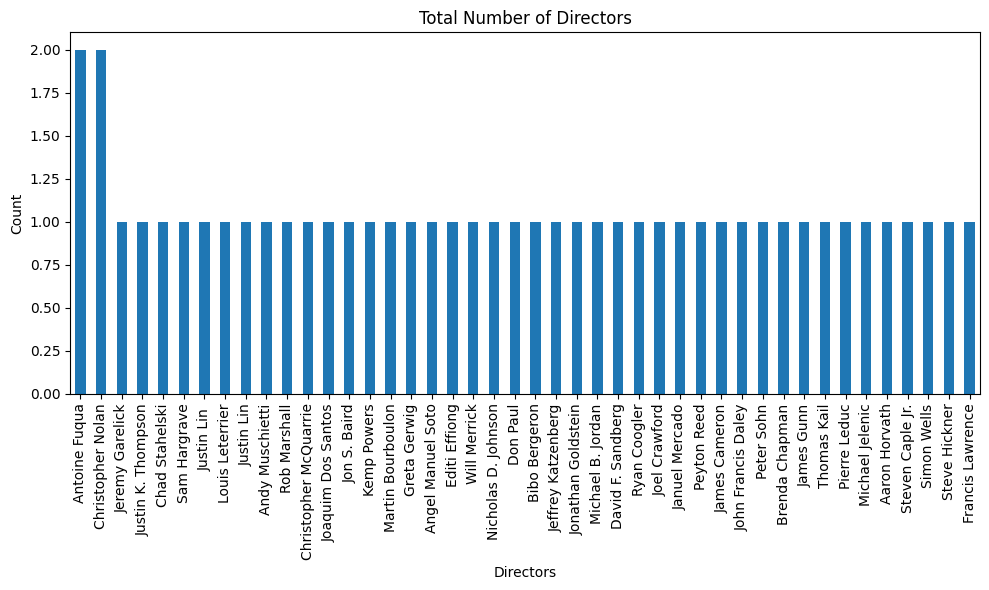

Antoine Fuqua            2
Christopher Nolan        2
Jeremy Garelick          1
Justin K. Thompson       1
Chad Stahelski           1
Sam Hargrave             1
Justin Lin               1
Louis Leterrier          1
Justin Lin               1
Andy Muschietti          1
Rob Marshall             1
Christopher McQuarrie    1
Joaquim Dos Santos       1
Jon S. Baird             1
Kemp Powers              1
Martin Bourboulon        1
Greta Gerwig             1
Angel Manuel Soto        1
Editi Effiong            1
Will Merrick             1
Nicholas D. Johnson      1
Don Paul                 1
Bibo Bergeron            1
Jeffrey Katzenberg       1
Jonathan Goldstein       1
Michael B. Jordan        1
David F. Sandberg        1
Ryan Coogler             1
Joel Crawford            1
Januel Mercado           1
Peyton Reed              1
James Cameron            1
John Francis Daley       1
Peter Sohn               1
Brenda Chapman           1
James Gunn               1
Thomas Kail              1
P

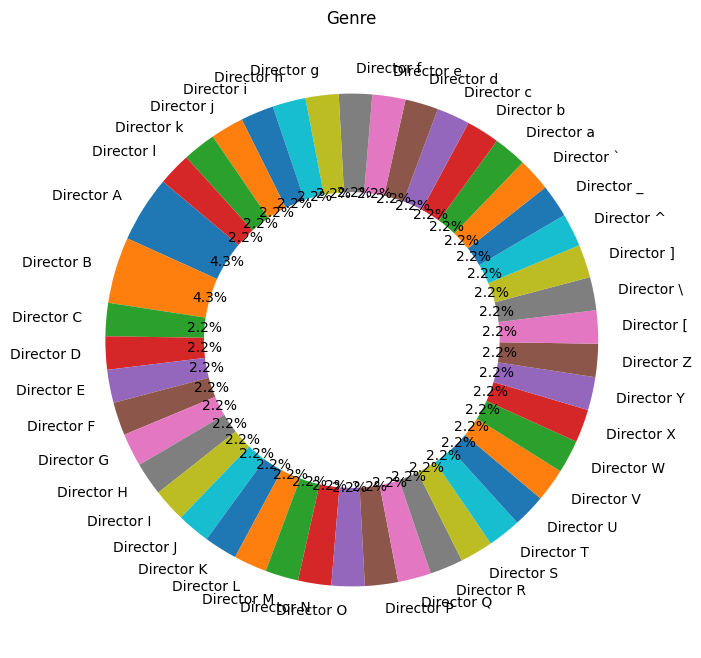

In [88]:
# Combine multiple genre columns into a single series
directors_series = directors_data.stack()

#
director_counts = directors_series.value_counts()

# Plot a bar chart
plt.figure(figsize=(10, 6))
director_counts.plot(kind='bar')
plt.title('Total Number of Directors')
plt.xlabel('Directors')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


print(director_counts)

# Get the most common director
most_common_director = director_counts.idxmax()

print("Favourite Director is:" , most_common_director)

### Writer Analysis

- A full analysis on writers. Find out the total number of writers, Favourite writer with number of associated movies and the Top 3 writers.

In [55]:
# Create dataframe for director
writers_data = movie_data['Writer'].str.split(',', expand=True)
writers_data.columns = [f"Writer_{i+1}" for i in range(writers_data.shape[1])]


writers_data.head(3)

,Writer_1,Writer_2,Writer_3
0,NaN,NaN,NaN
1,Noah Pink,None,None
2,Ryan Coogler,Keenan Coogler,Zach Baylin


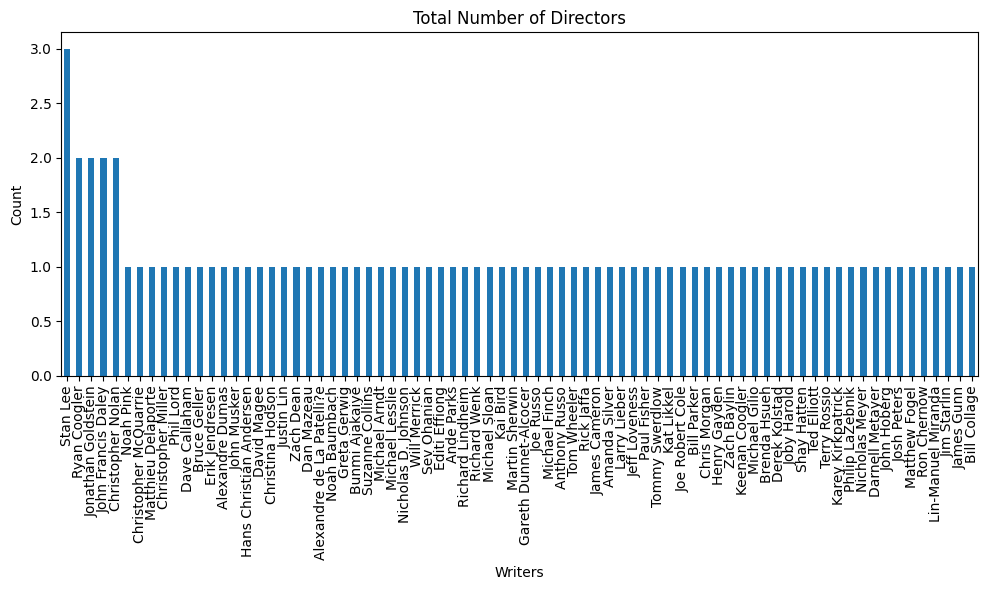

Stan Lee                     3
Ryan Coogler                 2
Jonathan Goldstein           2
John Francis Daley           2
Christopher Nolan            2
Noah Pink                    1
Christopher McQuarrie        1
Matthieu Delaporte           1
Christopher Miller           1
Phil Lord                    1
Dave Callaham                1
Bruce Geller                 1
Erik Jendresen               1
Alexandre Dumas              1
John Musker                  1
Hans Christian Andersen      1
David Magee                  1
Christina Hodson             1
Justin Lin                   1
Zach Dean                    1
Dan Mazeau                   1
Alexandre de La Patelli?e    1
Noah Baumbach                1
Greta Gerwig                 1
Bunmi Ajakaiye               1
Suzanne Collins              1
Michael Arndt                1
Michael Lesslie              1
Nicholas D. Johnson          1
Will Merrick                 1
Sev Ohanian                  1
Editi Effiong                1
Ande Par

In [74]:
# Combine multiple genre columns into a single series
writers_series = writers_data.stack()

writer_counts = writers_series.value_counts()

# Plot a bar chart
plt.figure(figsize=(10, 6))
writer_counts.plot(kind='bar')
plt.title('Total Number of Writers')
plt.xlabel('Writers')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print(writer_counts)

# Get the most common writer
most_common_writer = writer_counts.idxmax()

print("Favourite writer is:" , most_common_writer)

### Genre Analysis


- A full analysis on genres. Find out the total number of genres, Favourite genre with number of associated movies and the Top 3 genres.

In [57]:
# Create dataframe for genre
genres_data= movie_data['Main Genres'].str.split(',', expand=True)
genres_data.columns = [f"Genre_{i+1}" for i in range(genres_data.shape[1])]


genres_data

,Genre_1,Genre_2,Genre_3
0,Action,Comedy,Crime
1,Biography,Drama,History
2,Drama,Sport,None
3,Action,Adventure,Comedy
4,Action,Adventure,Drama
5,Animation,Adventure,Comedy
6,Action,Adventure,Comedy
7,Action,Adventure,Fantasy
8,Action,Adventure,Comedy
9,Animation,Adventure,Comedy


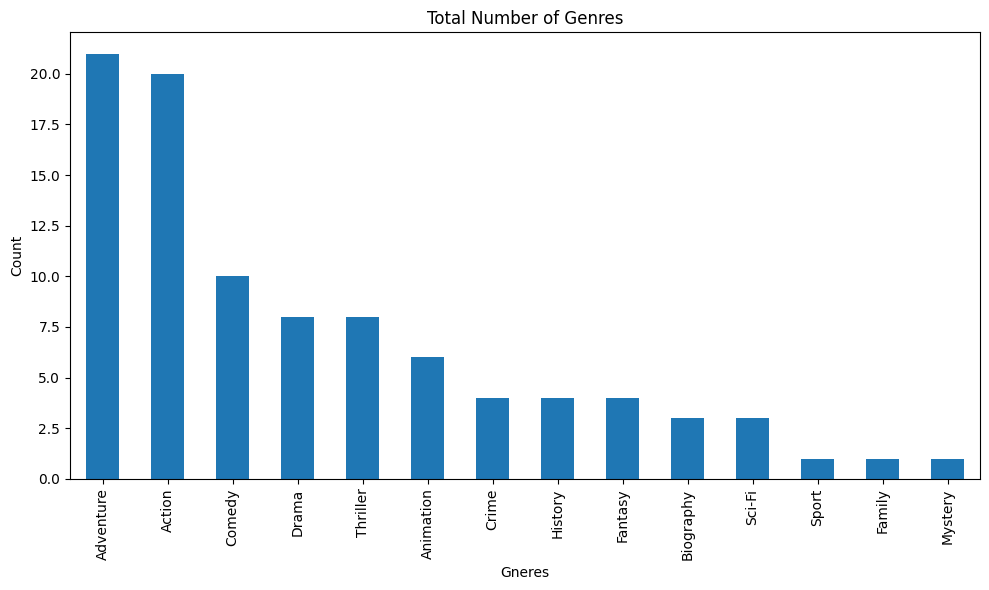

Adventure    21
Action       20
Comedy       10
Drama         8
Thriller      8
Animation     6
Crime         4
History       4
Fantasy       4
Biography     3
Sci-Fi        3
Sport         1
Family        1
Mystery       1
Name: count, dtype: int64
Favourite genre is: Adventure
The number of distinct genres is: 14


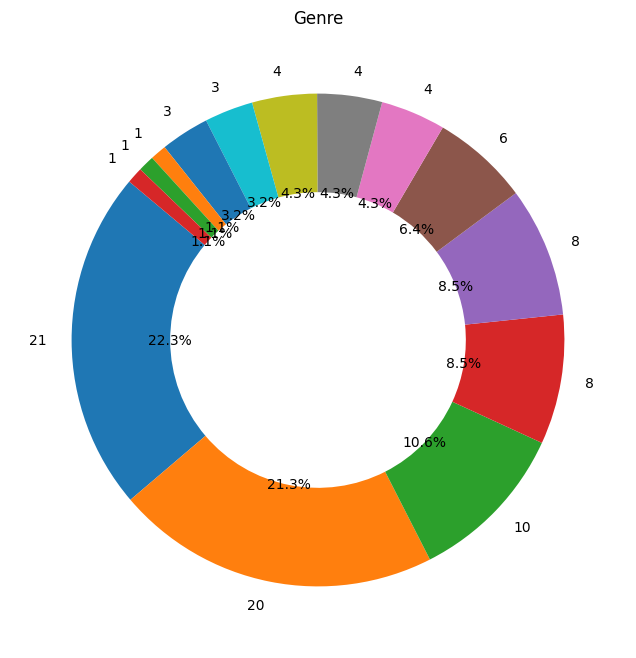

In [92]:
# Combine multiple genre columns into a single series
genres_series = genres_data.stack()

genre_counts = genres_series.value_counts()

# Plot a bar chart
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.title('Total Number of Genres')
plt.xlabel('Gneres')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# # Plot a Donut Chart wuth custom labels
# custom_lables = [f"Genre {chr(65 + i)}" for i in range(len(genre_counts))]
# plt.figure(figsize=(8,8))
# plt.pie(genre_counts,labels=custom_lables,autopct='%1.1f%%',startangle=140,wedgeprops=dict(width=0.4))
# plt.title("Genre")

# Plot a Donut Chart
plt.figure(figsize=(8,8))
plt.pie(genre_counts,labels=genre_counts,autopct='%1.1f%%',startangle=140,wedgeprops=dict(width=0.4))
plt.title("Genre")

print(genre_counts)

# Get the most common genre
most_common_genre = genre_counts.idxmax()

print("Favourite genre is:" , most_common_genre)


# Count the number of distinct genres
num_distinct_genres = genres_series.nunique()

print(f"The number of distinct genres is: {num_distinct_genres}")

### Rating and Months watched

 - Analysis on ratings and month watched. Find the Best movie watched and worst movie watched. Find the average movie. Find the total number of movies watched for each month. Find the month with the highest and lowest amount of movies watched. Find the median.

In [59]:
# Highest rated movie
highest_rated_movie = movie_data.loc[movie_data['Rating'].idxmax(),['Title','Rating']]

# Lowest rated movie
lowest_rated_movie = movie_data.loc[movie_data['Rating'].idxmin(),['Title','Rating']]

# Top 3 highest rated movies
top_3_highest_rated_movies = movie_data.nlargest(3, 'Rating')[['Title','Rating']]

# Average rating
average_rating = movie_data['Rating'].mean()
average_rating = average_rating.astype(int)

average_rated_movie = movie_data.loc[average_rating,['Title','Rating']]

print("Highest Rated Movie:")
print(highest_rated_movie)
print("\nLowest Rated Movie:")
print(lowest_rated_movie)
print("\nTop 3 Highest Rated Movies:")
print(top_3_highest_rated_movies)
print("\nAverage Rated Movie:", average_rated_movie)
print("\nAverage Rating:", average_rating)



Highest Rated Movie:
Title     Spider-Man: Across the Spider-Verse
Rating                                    8.7
Name: 22, dtype: object

Lowest Rated Movie:
Title     The Black Book
Rating               5.2
Name: 28, dtype: object

Top 3 Highest Rated Movies:
                                  Title  Rating
22  Spider-Man: Across the Spider-Verse     8.7
26                          Oppenheimer     8.5
11                             Hamilton     8.3

Average Rated Movie: Title     Ant-Man and the Wasp: Quantumania
Rating                                  6.1
Name: 6, dtype: object

Average Rating: 6


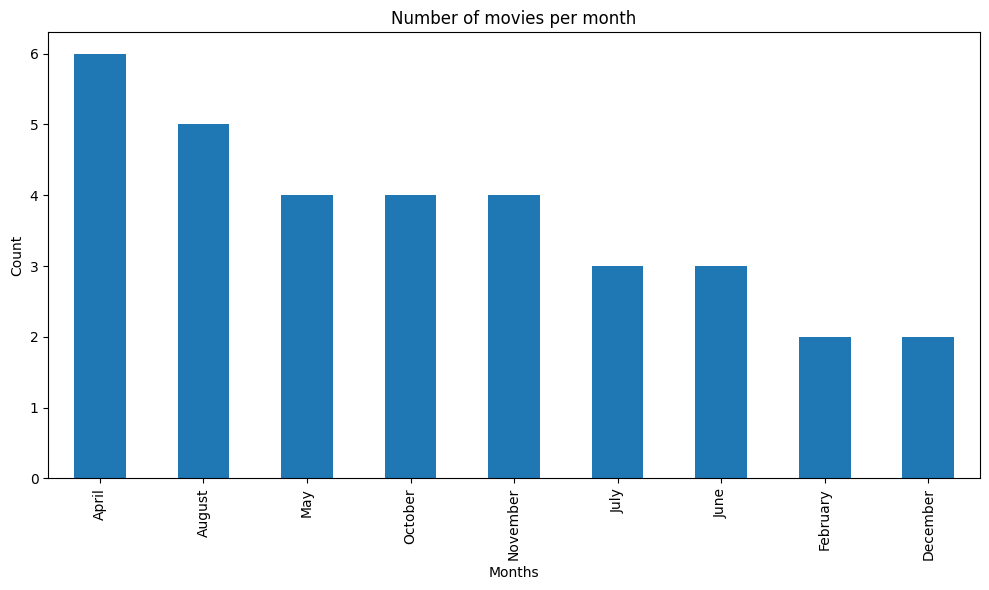

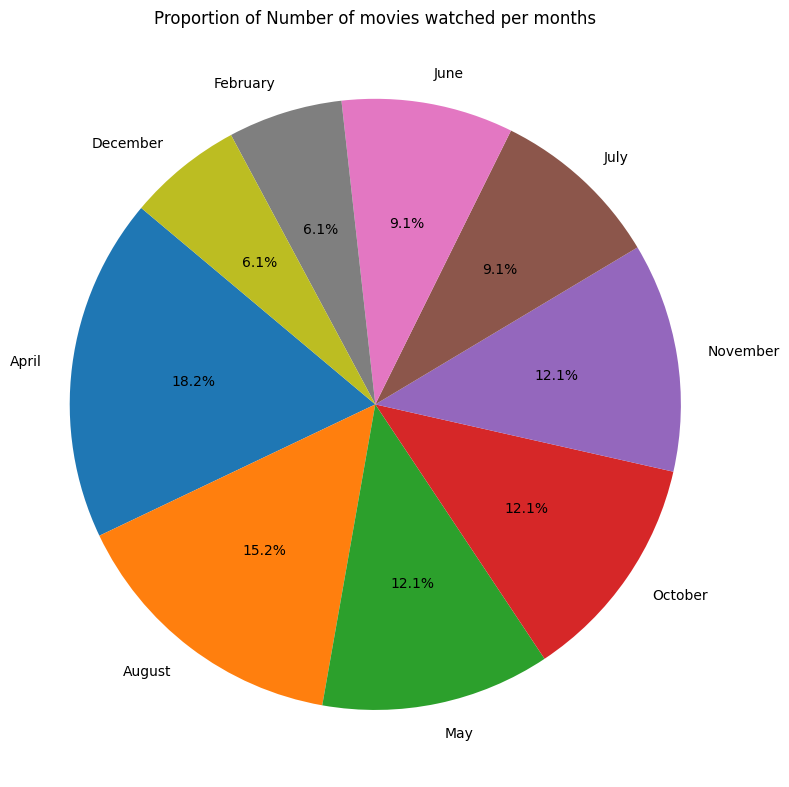

Number of Movies Watched for Each Month:
Month Watched
April       6
August      5
May         4
October     4
November    4
July        3
June        3
February    2
December    2
Name: count, dtype: int64

Highest Movies Watched in a Month: 6
Lowest Movies Watched in a Month: 2
Average Movies Watched per Month: 3.6666666666666665


In [83]:
# Months watched code

# Group movies by month and count the number of movies watched for each month
movies_per_month = movie_data['Month Watched'].value_counts()

# Plot a bar chart
plt.figure(figsize=(10, 6))
movies_per_month.plot(kind='bar')
plt.title('Number of movies per month')
plt.xlabel('Months')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plot a Pie chart
plt.figure(figsize=(8, 8))
plt.pie(movies_per_month,labels=movies_per_month.index,autopct='%1.1f%%',startangle=140)
plt.title('Proportion of Number of movies watched per months')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Get statistics: highest, lowest, and average movies watched per month
highest_movies_watched = movies_per_month.max()
lowest_movies_watched = movies_per_month.min()
average_movies_watched = movies_per_month.mean()

print("Number of Movies Watched for Each Month:")
print(movies_per_month)
print("\nHighest Movies Watched in a Month:", highest_movies_watched)
print("Lowest Movies Watched in a Month:", lowest_movies_watched)
print("Average Movies Watched per Month:", average_movies_watched)

### Full review

- Favourite Genre,Director, Writer,Performer(Actor/Actress)

- Least watched genre

- Total movies, distinct genres, directos, writers, runtime.

- Most watched month
- Least watched month

- Top 3 movies, months watched, genres, Directors, Performers,writers

- Best movie (rated)

- Worst movie (rated)

In [61]:
# code goes here

## Data visualization

In [62]:
#Dashboard goes here